In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ammaraahmad/top-10-machine-learning-datasets")
import pandas as pd


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ravipratap1303
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ammaraahmad/top-10-machine-learning-datasets


100%|██████████| 883k/883k [00:00<00:00, 41.9MB/s]

In [2]:
data= pd.read_csv("/content/top-10-machine-learning-datasets/cust_segmentation_Data.csv")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [4]:
data.drop('Customer Id',axis= 1, inplace= True)


In [5]:
data


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [6]:
data.isnull().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [7]:
data['Defaulted'].unique()

array([ 0.,  1., nan])

In [8]:
data['Defaulted']= data['Defaulted'].fillna(data['Defaulted'].mode()[0])


In [9]:
data['Defaulted']

,Defaulted
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
845,0.0
846,0.0
847,1.0
848,0.0


In [10]:
data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [11]:
x= data.drop('Defaulted', axis= 1)
y= data['Defaulted']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model= Sequential()
model.add(Dense(100,activation='relu',input_dim=7))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history= model.fit(x_train,y_train,epochs=300,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7687 - loss: 0.5343 - val_accuracy: 0.8235 - val_loss: 0.4197
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.4758 - val_accuracy: 0.8176 - val_loss: 0.4229
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4392 - val_accuracy: 0.8059 - val_loss: 0.4077
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.4272 - val_accuracy: 0.8118 - val_loss: 0.3953
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8050 - loss: 0.4166 - val_accuracy: 0.8118 - val_loss: 0.3972
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8099 - loss: 0.4122 - val_accuracy: 0.8176 - val_loss: 0.3980
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8032 - loss: 0.4398 - val_accuracy: 0.8235 - val_loss: 0.4065
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.4545 - val_accuracy: 0.7647 - 

In [19]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_test)
y_pred= [1 if y>=0.5 else 0 for y in y_pred]
accuracy_score(y_test,y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7294117647058823

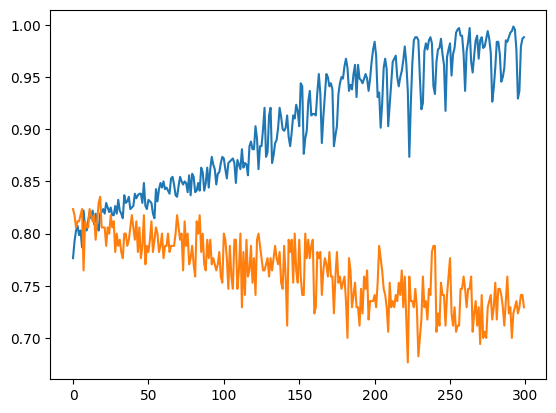

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [21]:
model.save('model.h5')